In [1]:
with open('files/trad_cn_names.txt',encoding='UTF-8') as f:
    names = f.readlines()
ch_names = [i.strip() for i in names]

ch_names[0:5]

['元柏民', '任銘', '游連連', '門瑋翔', '侯光鴻']

In [2]:
with open('files/common_givennames.txt', encoding='UTF-8') as f:
    names = f.readlines()
given_names = [name.strip() for name in names]
given_names[0:5]

['Mei Yan', 'Xiong Sik', 'Sik Qin', 'Chun Ki', 'Choi Mei']

In [3]:
with open('files/common_surnames.txt', encoding='UTF-8') as f:
    names = f.readlines()
surnames = [name.strip() for name in names]
surnames[0:5]

['AH', 'ANG', 'AU YEUNG', 'AU YONG', 'BAI']

In [4]:
with open('files/hkid.txt', encoding='UTF-8') as f:
    ids = f.readlines()
ids = [id.strip() for id in ids]
ids[0:5]

['V877567(2)', 'B203419(0)', 'J561393(5)', 'E175669(1)', 'J840955(7)']

In [5]:
import random
def gen_text():
    name = random.choice(ch_names)
    en_name = random.choice(surnames) + ', ' + random.choice(given_names) 
    gender = random.choice(['男', '女'])
  
    year = random.randint(1960, 2010)
    issue_year = random.randint(1, 100)
    issue_month = random.randint(1, 12)

    renew_year = random.randint(1, 99)
    renew_month = random.randint(1, 12)
    renew_day = random.randint(1, 31)

    
    
    month = random.randint(1, 12)
    day = random.randint(1, 31)
    number = str(random.randint(100000, 999999))

    month_s = str(month)
    if len(month_s) == 1:
        month_s = '0' + month_s

    day_s = str(day)
    if len(day_s) == 1:
        day_s = '0' + day_s

    number = random.choice(ids)

    return name,en_name, gender, year, month, day, issue_year, issue_month, renew_year, renew_month, renew_day, number


gen_text()

('淩栩易', 'LOO, PingSze Suk', '女', 1960, 2, 28, 33, 2, 44, 9, 26, 'Q144099(A)')

In [ ]:
import PIL.Image
import PIL.ImageFont
import PIL.ImageDraw

def gen_image(name, en_name, gender, year, month, day, issue_year, issue_month, renew_year, renew_month, renew_day, number):
    OCR_B = open("files/font/OCR-B.TTF", "rb")
    SimSun = open("files/font/SimSun-01.TTF", "rb")
    ocr_b_font = BytesIO(file.read())
    simsun_font = BytesIO(file.read())
    ch_font = PIL.ImageFont.truetype(ocr_b_font, size=13)
    ch_font_small = PIL.ImageFont.truetype('files/font/SimSun-01.TTF', size=10)
    image = PIL.Image.open('sampleidcard_crop.jpg').resize((320, 200))
    # image = PIL.Image.new('RGB', [320, 200], (226, 233, 242))

    draw = PIL.ImageDraw.Draw(image)
    small = PIL.ImageFont.truetype('files/font/OCR-B.TTF', size=8)
    font = PIL.ImageFont.truetype('files/font/OCR-B.TTF', size=10)
    large = PIL.ImageFont.truetype('files/font/OCR-B.TTF', size=14)

    name_x = 20
    for i in range(len(name)):
        draw.text(xy=[name_x, 41], text=name[i], font=ch_font, fill=(30, 30, 30))
        name_x += 19
      
    draw.text(xy=[20, 56], text=en_name, font=small, fill=(30, 30, 30))
    draw.text(xy=[209, 112],text=gender,font=ch_font_small, fill=(30, 30, 30))

    month_s = f"{month:02}"
    day_s = f"{day:02}"
    issue_year = f"{issue_year:02}"
    issue_month = f"{issue_month:02}"

    renew_year = f"{renew_year:02}"
    renew_month = f"{renew_month:02}"
    renew_day = f"{renew_day:02}"
    
    draw.text(xy=[127, 111],text=day_s,font=small,fill=(30, 30, 30))
    draw.text(xy=[142, 112],text= '-', font=small,fill=(30,30,30))
    draw.text(xy=[150, 111],text=month_s, font=small,fill=(30,30,30))
    draw.text(xy=[165, 112],text= '-', font=small,fill=(30,30,30))
    draw.text(xy=[172, 111],text=str(year) , font=small, fill=(30,30,30))
    
    draw.text(xy=[158, 152],text= issue_year + ')', font=small, fill=(30,30,30))
    draw.text(xy=[127, 152],text='('+ issue_month, font=small,fill=(30,30,30))
    draw.text(xy=[150, 152],text= '-', font=small,fill=(30,30,30))

    draw.text(xy=[127, 170],text= renew_day, font=font,fill=(30,30,30))
    draw.text(xy=[146, 170],text= '-', font=font,fill=(30,30,30))
    draw.text(xy=[157,170], text=renew_month, font=font,fill=(30,30,30))
    draw.text(xy=[175, 170],text= '-', font=font,fill=(30, 30, 30))
    draw.text(xy=[185,170], text=renew_year, font=font,fill=(30, 30, 30))


    draw.text(xy=[222, 170], text=number, font=font, fill=(30, 30, 30))

    return image


gen_image(*gen_text())

In [11]:
def gen_box(name, en_name, gender, year, month, day, issue_year, issue_month, renew_year, renew_month, renew_day, number):
    box = []
    x2 = 53
    if len(name) == 3:
        x2 = 73
    if len(name) == 4:
        x2 = 85
        
    box.append({'box': [95, 5, 225, 20], 'word': '香港永久性居民身份證', 'cls': 0})
    box.append({'box': [18, 40, x2, 55], 'word': name, 'cls': 1})
    box.append({'box': [18, 56, len(en_name)*7.5+20, 70], 'word': en_name, 'cls': 2})

    box.append({'box': [125, 110, 200, 126], 'word': f"{day:02}-{month:02}-{year:02}", 'cls': 3})
    box.append({'box': [208, 110, 220, 126], 'word': gender, 'cls': 4})

    box.append({'box': [125, 150, 180, 165], 'word': f"({issue_month:02}-{issue_year:02})", 'cls': 5})

    box.append({'box': [125, 170, 205, 185], 'word': f"{renew_day:02}-{renew_month:02}-{renew_year}", 'cls': 6})

    box.append({'box': [220, 170, 308, 185], 'word': number, 'cls': 7})
    return box
gen_box(*gen_text())

[{'box': [95, 5, 225, 20], 'word': '香港永久性居民身份證', 'cls': 0},
 {'box': [18, 40, 73, 55], 'word': '戴小丹', 'cls': 1},
 {'box': [18, 56, 110.0, 70], 'word': 'IP, Hao Ming', 'cls': 2},
 {'box': [125, 110, 200, 126], 'word': '14-08-1996', 'cls': 3},
 {'box': [208, 110, 220, 126], 'word': '女', 'cls': 4},
 {'box': [125, 150, 180, 165], 'word': '(10-82)', 'cls': 5},
 {'box': [125, 170, 205, 185], 'word': '25-02-24', 'cls': 6},
 {'box': [220, 170, 308, 185], 'word': 'Z375695(2)', 'cls': 7}]

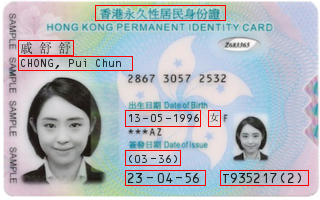

In [14]:
def show_box(image, box):
    draw = PIL.ImageDraw.Draw(image)

    for box in box:
        draw.rectangle(xy=box['box'], outline='red')

    return image


text = gen_text()
image = gen_image(*text)
box = gen_box(*text)

show_box(image, box)

[{'box': (76.21449796690024, 11.471746475266917, 160.1259187707861, 33.43540069318558), 'word': '香港永久性居民身份證', 'cls': 0}, {'box': (27.811823060307596, 57.32568922817733, 63.56890751360321, 76.61581625446063), 'word': '簡泓麒', 'cls': 1}, {'box': (28.285321154027933, 74.22423954149666, 92.58438487781622, 93.94535667354464), 'word': 'RUAN, Pui Mei', 'cls': 2}, {'box': (98.5835637471761, 133.66970513940032, 147.2113981914866, 154.82807544472533), 'word': '06-09-2005', 'cls': 3}, {'box': (151.87436264182926, 132.95676455496428, 160.05255455164405, 151.86937201931556), 'word': '女', 'cls': 4}, {'box': (99.76730898147694, 180.59475350806056, 135.52439343477258, 199.8848805343439), 'word': '(08-94)', 'cls': 5}, {'box': (100.35918159862737, 202.80963166962755, 152.16771150211977, 222.99093442645596), 'word': '27-05-73', 'cls': 6}, {'box': (161.35467430937499, 199.13798765978166, 218.29966675693024, 219.60446665038452), 'word': 'L864700(4)', 'cls': 7}]


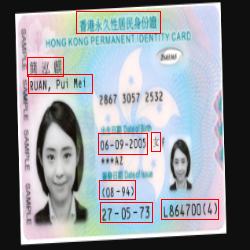

In [15]:
import albumentations
import numpy as np


def compose(image, box):

    def random_color():
        return random.randint(0, 255), random.randint(0, 255), random.randint(
            0, 255)

    transform = albumentations.Compose(
        [
            albumentations.CropAndPad(
                px=(50, 100), keep_size=False, pad_cval=random_color()),
            albumentations.RandomBrightnessContrast(brightness_limit=0.1),
            albumentations.ShiftScaleRotate(
                scale_limit=0.2, rotate_limit=8, p=1.0),
            albumentations.ColorJitter(),
            albumentations.AdvancedBlur(blur_limit=(1, 3)),
            albumentations.HueSaturationValue(),
            albumentations.GaussNoise(),
            albumentations.RandomSizedBBoxSafeCrop(250, 250),
        ],
        bbox_params=albumentations.BboxParams(format='pascal_voc'))

    image = np.array(image)
    bboxes = [[*i['box'], None] for i in box]

    transformed = transform(image=image, bboxes=bboxes)

    image = PIL.Image.fromarray(transformed['image'], 'RGB')

    for i in range(len(transformed['bboxes'])):
        bbox = transformed['bboxes'][i]
        box[i]['box'] = bbox[:4]

    return image, box


text = gen_text()
image = gen_image(*text)
box = gen_box(*text)
image, box = compose(image, box)
print(box)
show_box(image, box)
image